In [1]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import  fetch_california_housing

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

<p style="align: center;"><img align=center src="https://netology.ru/backend/tilda/images/tild3439-3364-4535-b334-656263633534__main.svg"  width=900></p>
<h3 style="text-align: center;"><b>Деревья решений</b></h3>

#  Домашнее задание

### Задание  
    
В домашнем задании нужно решить задачу регрессии. В качестве датасета необходимо взять данные о недвижимости Калифорнии из библиотеки sklearn.datasets. Целевая переменная – MedHouseVal. Прочитать информацию о признаках датасета можно, выполнив следующий код – print(fetch_california_housing().DESCR). На полученных данных построить модель регрессии и дерево решений.

1. Получите данные и загрузите их в рабочую среду. (Jupyter Notebook или другую).
2. Проведите первичный анализ.
        a.Проверьте данные на пропуски. Удалите в случае обнаружения.
        b.*Нормализуйте один из признаков.
3. Разделите выборку на обучающее и тестовое подмножества. 80% данных оставить на обучающее множество, 20% - на тестовое.
4. Обучите модель регрессии на обучающем множестве.
5. Для тестового множества предскажите целевую переменную и сравните с истинным значением, посчитав точность предсказания модели. Для этого используйте встроенную функцию score.
6. Обучите дерево решений на обучающем множестве.
        a. Повторите п. 5 для полученной модели.
7. Оптимизируйте глубину дерева (max_depth). *Оптимизируйте ещё один параметр модели на выбор.
        a. Повторите п. 5 для полученной модели.
8. Сформулируйте выводы по проделанной работе.
        a. Сравните точность двух моделей.
        b. Напишите свое мнение, для каких задач предпочтительнее использовать обученные в работе модели? Какие у них есть плюсы и минусы?

##### 1. Загрузила данные.

In [2]:
housevalue = fetch_california_housing()
housevalue

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

##### 2. Проведите первичный анализ.

In [3]:
housevalue.feature_names

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude']

In [4]:
# The target variable is the median house value for California districts, 
# expressed in hundreds of thousands of dollars ($100,000).

housevalue.target_names

['MedHouseVal']

In [5]:
data = pd.DataFrame(housevalue.data,columns=housevalue.feature_names)
data = data.assign(MedHouseVal = housevalue.target)
data.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [6]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [7]:
data.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


######  b.*Нормализуйте один из признаков.

In [8]:
d = preprocessing.normalize([data["MedInc"]], norm='l2')
d

array([[0.01343958, 0.01340116, 0.0117158 , ..., 0.00274435, 0.00301427,
        0.00385598]])

In [9]:
norm_data = pd.DataFrame(data, columns=data.columns)
norm_data = data.assign(MedInc = pd.Series(d[0]))
norm_data.head(10)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,0.013440,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,0.013401,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,0.011716,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,0.009110,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,0.006209,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
5,0.006517,52.0,4.761658,1.103627,413.0,2.139896,37.85,-122.25,2.697
6,0.005907,52.0,4.931907,0.951362,1094.0,2.128405,37.84,-122.25,2.992
7,0.005037,52.0,4.797527,1.061824,1157.0,1.788253,37.84,-122.25,2.414
8,0.003358,42.0,4.294118,1.117647,1206.0,2.026891,37.84,-122.26,2.267
9,0.005959,52.0,4.970588,0.990196,1551.0,2.172269,37.84,-122.25,2.611


In [10]:
# minmaxscaler = preprocessing.MinMaxScaler(feature_range=(0,2))
# d = minmaxscaler.fit_transform([data["HouseAge"]])
# d

In [11]:
# norm_data = pd.DataFrame(data, columns=data.columns)
# norm_data = data.assign(HouseAge = pd.Series(d[0]))
# norm_data.head(10)

###### 3. Разделите выборку на обучающее и тестовое подмножества. 80% данных оставить на обучающее множество, 20% - на тестовое.

In [12]:
X = norm_data[norm_data.columns[:-1]]
X.head(2)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,0.013440,41.0,6.984127,1.02381,322.0,2.555556,37.88,-122.23
1,0.013401,21.0,6.238137,0.97188,2401.0,2.109842,37.86,-122.22


In [13]:
y = norm_data['MedHouseVal']
y.head(2)

0    4.526
1    3.585
Name: MedHouseVal, dtype: float64

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

###### 4. Обучите модель регрессии на обучающем множестве.

In [15]:
lr = LinearRegression()

In [16]:
lr.fit(X_train, y_train)

LinearRegression()

In [17]:
y_pred =lr.predict(X_train)   # Get the prediction 
y_test_pred = lr.predict(X_test)

###### 5. Для тестового множества предскажите целевую переменную и сравните с истинным значением, посчитав точность предсказания модели. Для этого используйте встроенную функцию score.

In [18]:
lr.score(X_test, y_test)

0.614114731888449

###### 6. Обучите дерево решений на обучающем множестве.
        a. Повторите п. 5 для полученной модели.

In [19]:
tree = DecisionTreeRegressor(max_depth=2)

In [20]:
tree.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=2)

In [21]:
y_pred = tree.predict(X_train)   # Get the prediction 
y_test_pred = tree.predict(X_test)

In [22]:
tree.score(X_test, y_test)

0.45989894065229153

         b. Визуализируйте часть дерева решений. Убедитесь, что график получился читабельным. Посмотрите примеры визуализации по ссылке.

In [23]:
from IPython.display import Image  
from sklearn.tree import export_graphviz

from six import StringIO
import pydotplus

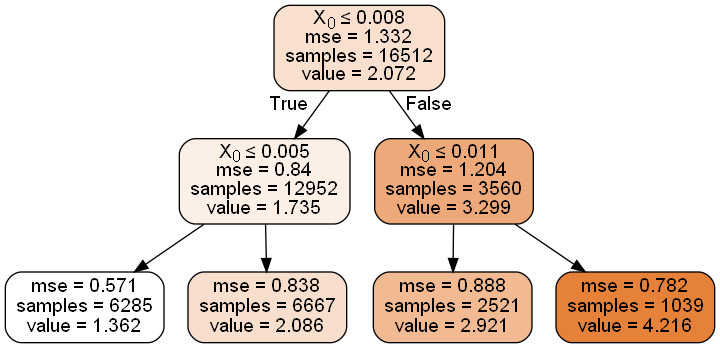

In [24]:
dot_data = StringIO()
export_graphviz(tree, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

###### 7. Оптимизируйте глубину дерева (max_depth). *Оптимизируйте ещё один параметр модели на выбор.
        a. Повторите п. 5 для полученной модели.

In [26]:
tree = DecisionTreeRegressor(criterion="friedman_mse", max_depth=10)
tree.fit(X_train, y_train)

DecisionTreeRegressor(criterion='friedman_mse', max_depth=10)

In [27]:
y_pred = tree.predict(X_train)   # Get the prediction 
y_test_pred = tree.predict(X_test)

In [28]:
tree.score(X_test, y_test)

0.6997488110539161

In [30]:
 from sklearn.metrics import mean_squared_error

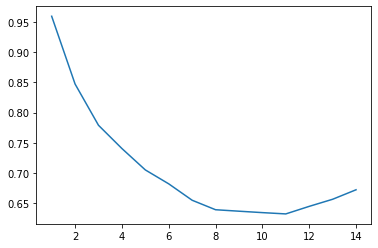

In [31]:
max_depth = []

for i in range(1, 15):
    tree = DecisionTreeRegressor(criterion="friedman_mse", max_depth=i)
    tree.fit(X_train, y_train)
    y_pred = tree.predict(X_train)   # Get the prediction 
    y_test_pred = tree.predict(X_test)
    error = np.sqrt(mean_squared_error(y_test, y_test_pred))
    max_depth.append(error)    
    
plt.plot(range(1, 15), max_depth)

График изменения MSE в зависимости от максимальной глубины дерева. 
Наименьшая ошибка достигается при max_depth=10

##### 8. Сформулируйте выводы по проделанной работе.
        a. Сравните точность двух моделей.

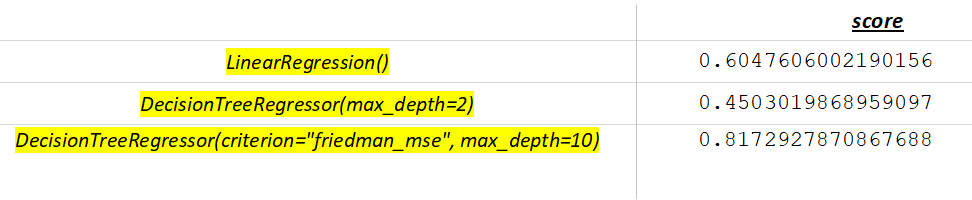

        b. Напишите свое мнение, для каких задач предпочтительнее использовать обученные в работе модели? Какие у них есть плюсы и минусы?

### ВЫВОДЫ: 

Для задач регрессии, дерево решений при правильно подобранной глубине, показывает лучшее качество модели, чем линейная регрессия.